Set parameter Username
Set parameter LicenseID to value 2621594
Academic license - for non-commercial use only - expires 2026-02-13
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 11 rows, 121 columns and 36 nonzeros
Model fingerprint: 0x1432593a
Variable types: 0 continuous, 121 integer (121 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 11 rows and 121 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 4 6 

Optimal solution found (

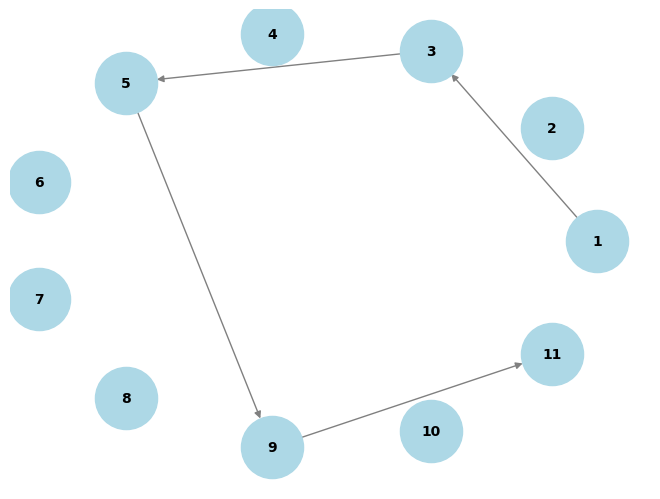

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 20 13:40:58 2025

@author: 1119f
"""

# -*- coding: utf-8 -*-

from gurobipy import Model, GRB
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

## Parameters and sets
##*****************************************************
n = 11

nodes = [i for i in range(1,n+1)]
supply = {1: 1, 11: -1}

## Distance matrix
# 1 2 3 4 5
link = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # 1
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # 2
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],  # 3
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # 4
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],  # 5
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],  # 6
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # 7
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],  # 8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # 11
     ]

## Model
##*****************************************************

## Initialization
m = Model("ShortestPath")


x = m.addVars(nodes,nodes,vtype = GRB.BINARY,name="x")

m.setObjective(
    sum(link[i-1][j-1]*x[i,j] for i in nodes for j in nodes),
    GRB.MINIMIZE
    )

for i in nodes:
    inflow = sum(link[j - 1][i - 1]*x[j, i] for j in nodes)
    outflow = sum(link[i - 1][j - 1]*x[i, j] for j in nodes)
    m.addConstr(outflow - inflow == supply.get(i,0),f"flow{i}")
    
m.optimize()

G = nx.DiGraph()
for i in nodes:
    G.add_node(i)

if m.status == GRB.OPTIMAL:
    print(f"Optimal value: {m.objVal}")
    for i in nodes:
        for j in nodes:
            if x[i,j].x > 1e-6:
                print(f"Flow from {i} to {j}: {x[i,j].x}")
                G.add_edge(i, j)
                
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels=True,node_size=2000,node_color="Lightblue",font_size=10, font_weight="bold",edge_color="grey")
plt.show()